In [68]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("diabetes.csv")

Logistic regression is used because the outcome of the diabetes data has only two outcomes, 0 if one does not have diabetes, and 1 if one does have diabetes.

In [69]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

selected_features = ["Pregnancies","Glucose","BloodPressure","Insulin","BMI","DiabetesPedigreeFunction","Age","SkinThickness"]

data_x = data[selected_features]
data_y = data[["Outcome"]]
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=0)


model = sm.GLM(data_y, data_x, family=sm.families.Binomial()).fit()
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                Outcome   No. Observations:                  768
Model:                            GLM   Df Residuals:                      760
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -467.33
Date:                Fri, 11 Oct 2024   Deviance:                       934.65
Time:                        12:23:16   Pearson chi2:                     793.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.07374
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies             

The p-value for pregnancies, glucose, and blood pressure are all very low which indicate that they are useful predictors. Age might still be a useful predictor because its p-value is low, but a little too high. The other variables don't seem useful because all their p-values are very high.

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Outcome   No. Observations:                  614
Model:                            GLM   Df Residuals:                      611
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -381.59
Date:                Fri, 11 Oct 2024   Deviance:                       763.18
Time:                        12:23:40   Pearson chi2:                     629.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06181
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Pregnancies       0.0768      0.026      2.984

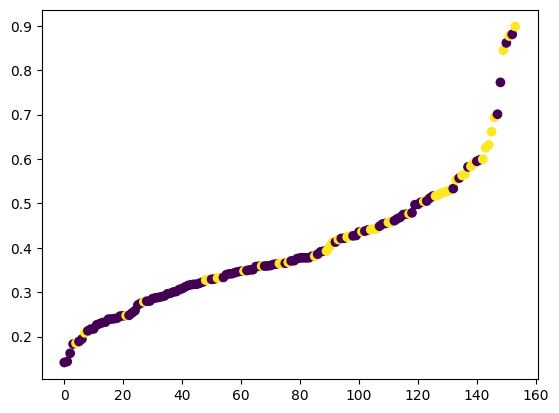

In [71]:
# Creating a model using the four variables with low p-values and charting the predictions with the actual values
selected_features = ["Pregnancies", "Glucose", "BloodPressure"]

train_x = train_x[selected_features]
test_x = test_x[selected_features]

model = sm.GLM(train_y, train_x, family=sm.families.Binomial()).fit()
predictions = pd.DataFrame(model.predict(test_x))
predictions.columns = ["Predictions"]
compare = pd.concat([predictions, test_y], axis=1)
compare = compare.sort_values(by="Predictions").reset_index()

plt.scatter(compare.index, compare["Predictions"], c=compare["Outcome"])
